In [68]:
import pandas as pd
import numpy as np
import csv

import seaborn as sns
import matplotlib.pyplot as plt

In [69]:
def read_frames_from_csv(filename):
    frames = []
    current_frame = []

    with open(filename, 'r', newline='') as f:
        reader = csv.reader(f)
        for row in reader:
            if not row:  # Blank row signals new frame
                if current_frame:
                    frames.append(np.array(current_frame, dtype=float))
                    current_frame = []
            else:
                current_frame.append([float(x) for x in row])

        # Add the last frame if file didn't end with a blank line
        if current_frame:
            frames.append(np.array(current_frame, dtype=float))

    return frames

# Usage
distance_matrices = read_frames_from_csv('distance_matrices.csv')
clusteriness_matrices = read_frames_from_csv('clusteriness_matrices.csv')

In [78]:
# average distances

distance_means = []
for matrix in distance_matrices:
    non_zero_values = matrix[matrix != 0]
    mean = np.mean(non_zero_values)
    distance_means.append(mean)

distance_means = np.array(distance_means)
inverse_distance_means = 1 / distance_means


# minimum distances
max_inv_dist_means = []
for matrix in distance_matrices:
    max_inv_dists = []
    for row in matrix:
        non_zeros = row[row != 0]
        non_zeros = 1 / non_zeros
        if non_zeros.size != 0:
            max_inv_dist = np.max(non_zeros)
            max_inv_dists.append(max_inv_dist)

    max_inv_dist_means.append(np.mean(max_inv_dists))

max_inverse_distance_means = np.array(max_inv_dist_means)


# average clusteriness

clusteriness_means = []
for matrix in clusteriness_matrices:
    non_zero_values = matrix[matrix != 0]
    mean = np.mean(non_zero_values)
    clusteriness_means.append(mean)

clusteriness_means = np.array(clusteriness_means)


# min clusteriness 

max_clusteriness_means = []
for matrix in clusteriness_matrices:
    max_clusterinesses = []
    for row in matrix:
        non_zeros = row[row != 0]
        if non_zeros.size != 0:
            max_clusteriness = np.max(non_zeros)
            max_clusterinesses.append(max_clusteriness)

    max_clusteriness_means.append(np.mean(max_clusterinesses))

max_clusteriness_means = np.array(max_clusteriness_means)

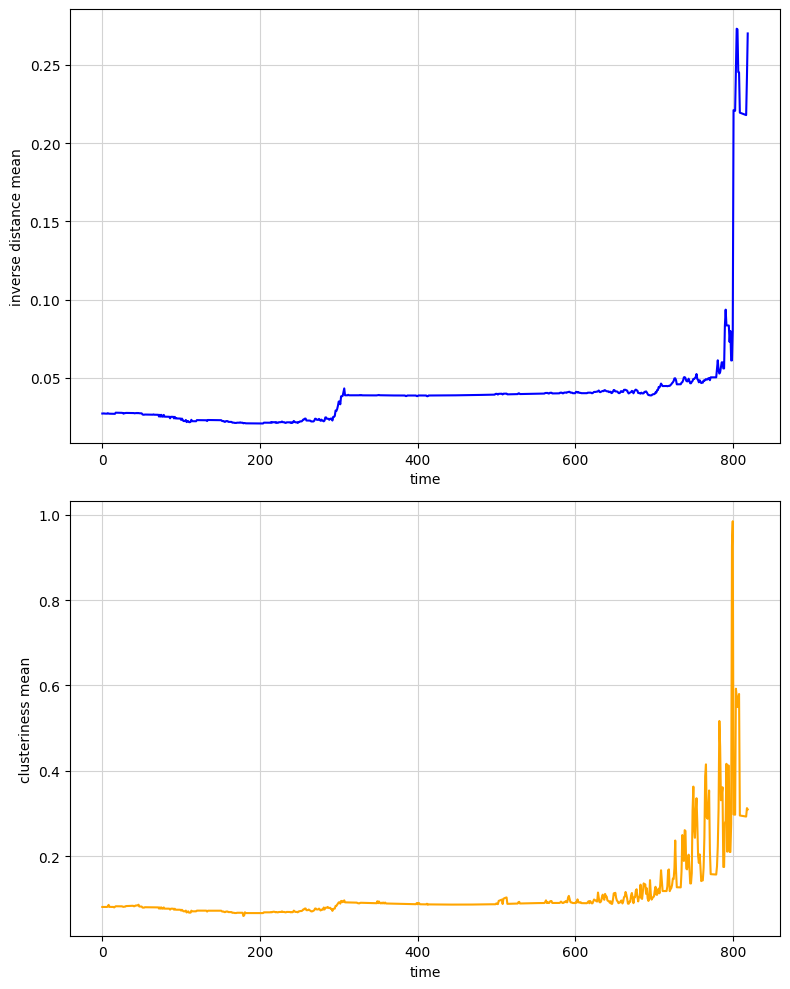

In [79]:
# Create the figure and a 1x2 grid of subplots
fig, axes = plt.subplots(2, 1, figsize=(8, 10))

# --- Subplot 1: Scatter Plot (Analogous to Figure S10 A) ---
ax1 = axes[0]

ax2 = axes[1]

# Plot the data
sns.lineplot(
    x=[i for i in range(len(inverse_distance_means))],
    y=inverse_distance_means,
    color='blue',
    ax=ax1
)

ax1.set_xlabel('time') 
ax1.set_ylabel('inverse distance mean')
ax1.grid(color='lightgrey')

sns.lineplot(
    x=[i for i in range(len(clusteriness_means))],
    y=clusteriness_means,
    color='orange',
    ax=ax2
)

ax2.set_xlabel('time') 
ax2.set_ylabel('clusteriness mean')
ax2.grid(color='lightgrey')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the figure
plt.show()

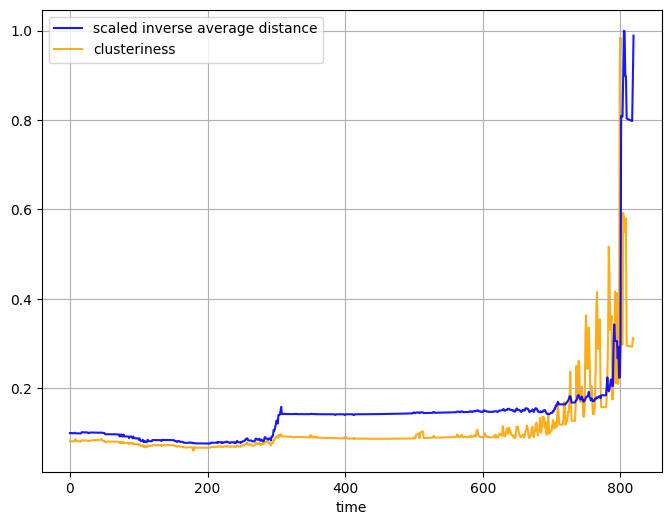

In [80]:
fig = plt.figure(figsize=(8, 6))

sns.lineplot(
    x=[i for i in range(len(distance_means))],
    y= inverse_distance_means / np.max(inverse_distance_means),
    color='blue',
    alpha=.9,
    label='scaled inverse average distance',
    zorder=2,
)

sns.lineplot(
    x=[i for i in range(len(distance_means))],
    y=clusteriness_means,
    color='orange',
    alpha=.9,
    label='clusteriness',
    zorder=1,
)

plt.xlabel('time')
plt.grid('lightgrey')

plt.show()

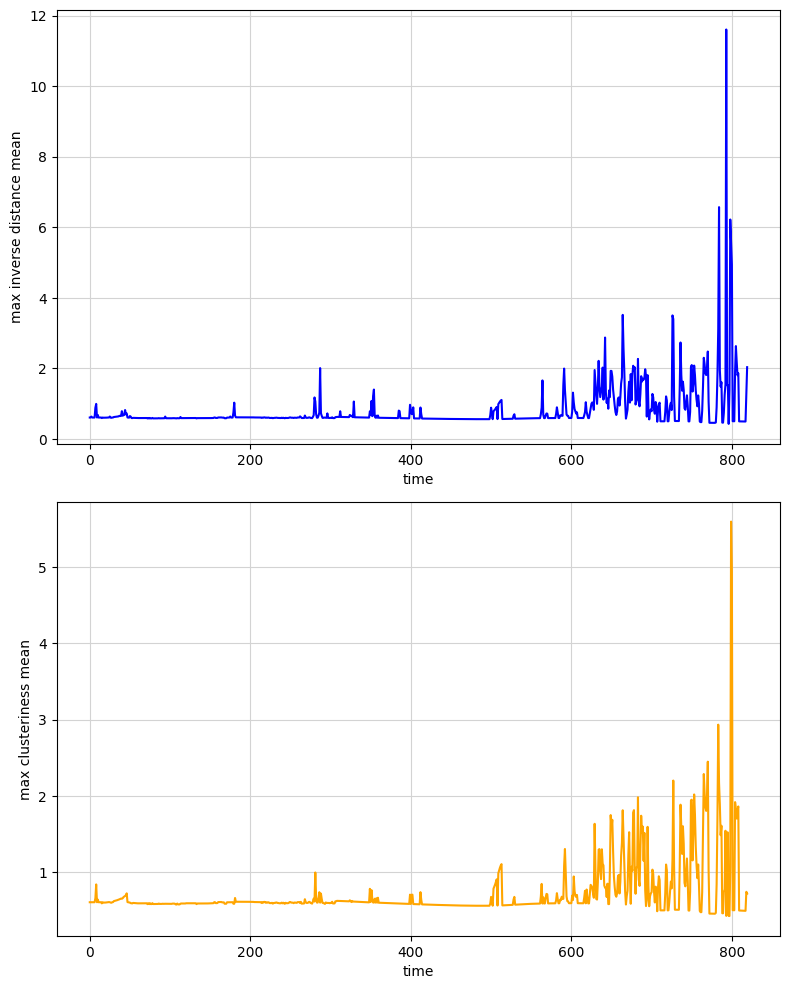

In [81]:
# Create the figure and a 1x2 grid of subplots
fig, axes = plt.subplots(2, 1, figsize=(8, 10))

# --- Subplot 1: Scatter Plot (Analogous to Figure S10 A) ---
ax1 = axes[0]

ax2 = axes[1]

# Plot the data
sns.lineplot(
    x=[i for i in range(len(max_inverse_distance_means))],
    y=max_inverse_distance_means,
    color='blue',
    ax=ax1
)

ax1.set_xlabel('time') 
ax1.set_ylabel('max inverse distance mean')
ax1.grid(color='lightgrey')

sns.lineplot(
    x=[i for i in range(len(max_clusteriness_means))],
    y=max_clusteriness_means,
    color='orange',
    ax=ax2
)

ax2.set_xlabel('time') 
ax2.set_ylabel('max clusteriness mean')
ax2.grid(color='lightgrey')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the figure
plt.show()

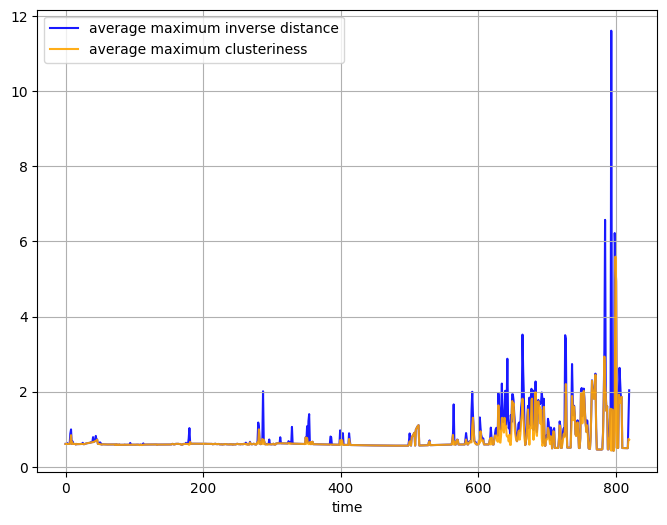

In [82]:
fig = plt.figure(figsize=(8, 6))

sns.lineplot(
    x=[i for i in range(len(max_inverse_distance_means))],
    y=max_inverse_distance_means,
    color='blue',
    alpha=.9,
    label='average maximum inverse distance',
    zorder=1,
)

sns.lineplot(
    x=[i for i in range(len(max_clusteriness_means))],
    y=max_clusteriness_means,
    color='orange',
    alpha=.9,
    label='average maximum clusteriness',
    zorder=2,
)

plt.xlabel('time')
plt.grid('lightgrey')

plt.show()